In [1]:
from pathlib import Path
import glob, os
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

### Location where data is stored

In [2]:
DATA_DIR = Path("/datadrive/MODIS_NDVI_Alaska/modis/tiffs_numpy/")
SHAPEFILE_DIR = Path("/datadrive/MODIS_NDVI_Alaska/modis/shps/ROI_small")

ANWR_DIR = DATA_DIR / "anwr"
IVOTUK_NORTH_DIR = DATA_DIR / "ivotuk_north"
IVOTUK_SOUTH_DIR = DATA_DIR / "ivotuk_south"
PRUDHOEBAY_DIR = DATA_DIR / "prudhoebay"
ANWR_SHAPEFILE_DIR = SHAPEFILE_DIR / "ANWR_small.shp"
IVOTUK_NORTH_SHAPEFILE_DIR = SHAPEFILE_DIR / "Ivotuk_north_small.shp"
IVOTUK_SOUTH_SHAPEFILE_DIR = SHAPEFILE_DIR / "Ivotuk_south_small.shp"
PRUDHOEBAY_SHAPEFILE_DIR = SHAPEFILE_DIR / "PrudhoeBay_small.shp"
df = pd.DataFrame(columns=["region","date","max_ndvi"])

### ANWR files

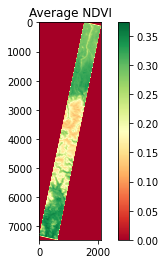

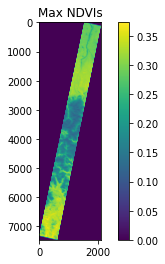

In [3]:
files = glob.glob(str(ANWR_DIR / "*"))
average_ndvi = np.zeros_like(np.load(files[0]), dtype=np.float32)
max_ndvi = np.zeros_like(np.load(files[0]), dtype=np.float32)
for i in range(len(files)):
    x = np.load(files[i])
    _date = datetime.strptime(os.path.basename(files[i]), "%Y_%m_%d.npy")
    _region = "anwr"
    _max = np.max(x)
    df.loc[len(df.index)] = [_region, _date, _max]
    average_ndvi += x
    max_ndvi += (x == np.max(x)).astype(np.uint8)
average_ndvi = average_ndvi/len(files)
max_ndvi = max_ndvi/len(files)
minimum, maximum = -2000, 10000
average_ndvi = (average_ndvi - minimum) / (maximum - minimum)
np.save(DATA_DIR / "anwr_average", average_ndvi)
np.save(DATA_DIR / "anwr_max", max_ndvi)
plt.figure()
plt.imshow(average_ndvi, cmap="RdYlGn")
plt.title("Average NDVI")
plt.colorbar()
plt.show()
plt.figure()
plt.imshow(average_ndvi)
plt.title("Max NDVIs")
plt.colorbar()
plt.show()

### prudhoebay files

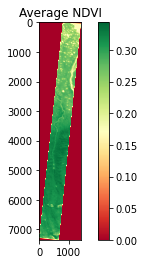

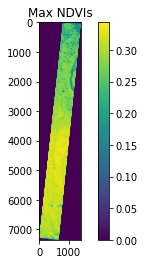

In [4]:
files = glob.glob(str(PRUDHOEBAY_DIR / "*"))
average_ndvi = np.zeros_like(np.load(files[0]), dtype=np.float32)
max_ndvi = np.zeros_like(np.load(files[0]), dtype=np.float32)
for i in range(len(files)):
    x = np.load(files[i])
    _date = datetime.strptime(os.path.basename(files[i]), "%Y_%m_%d.npy")
    _region = "prudhoebay"
    _max = np.max(x)
    df.loc[len(df.index)] = [_region, _date, _max]
    average_ndvi += x
    max_ndvi += (x == np.max(x)).astype(np.uint8)
average_ndvi = average_ndvi/len(files)
max_ndvi = max_ndvi/len(files)
minimum, maximum = -2000, 10000
average_ndvi = (average_ndvi - minimum) / (maximum - minimum)
np.save(DATA_DIR / "prudhoebay_average", average_ndvi)
np.save(DATA_DIR / "prudhoebay_max", max_ndvi)
plt.figure()
plt.imshow(average_ndvi, cmap="RdYlGn")
plt.title("Average NDVI")
plt.colorbar()
plt.show()
plt.figure()
plt.imshow(average_ndvi)
plt.title("Max NDVIs")
plt.colorbar()
plt.show()

### ivotuk files

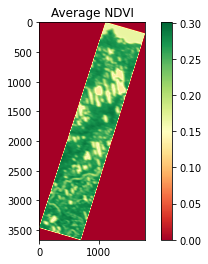

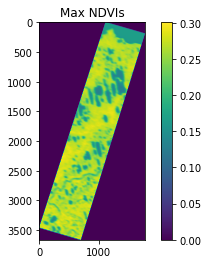

In [5]:
files = glob.glob(str(IVOTUK_NORTH_DIR / "*"))
average_ndvi = np.zeros_like(np.load(files[0]), dtype=np.float32)
max_ndvi = np.zeros_like(np.load(files[0]), dtype=np.float32)
for i in range(len(files)):
    x = np.load(files[i])
    _date = datetime.strptime(os.path.basename(files[i]), "%Y_%m_%d.npy")
    _region = "ivotuk_north"
    _max = np.max(x)
    df.loc[len(df.index)] = [_region, _date, _max]
    average_ndvi += x
    max_ndvi += (x == np.max(x)).astype(np.uint8)
average_ndvi = average_ndvi/len(files)
max_ndvi = max_ndvi/len(files)
minimum, maximum = -2000, 10000
average_ndvi = (average_ndvi - minimum) / (maximum - minimum)
np.save(DATA_DIR / "ivotuk_average", average_ndvi)
np.save(DATA_DIR / "ivotuk_max", max_ndvi)
plt.figure()
plt.imshow(average_ndvi, cmap="RdYlGn")
plt.title("Average NDVI")
plt.colorbar()
plt.show()
plt.figure()
plt.imshow(average_ndvi)
plt.title("Max NDVIs")
plt.colorbar()
plt.show()

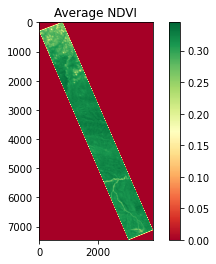

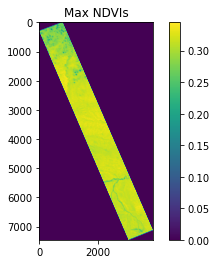

In [6]:
files = glob.glob(str(IVOTUK_SOUTH_DIR / "*"))
average_ndvi = np.zeros_like(np.load(files[0]), dtype=np.float32)
max_ndvi = np.zeros_like(np.load(files[0]), dtype=np.float32)
for i in range(len(files)):
    x = np.load(files[i])
    _date = datetime.strptime(os.path.basename(files[i]), "%Y_%m_%d.npy")
    _region = "ivotuk_south"
    _max = np.max(x)
    df.loc[len(df.index)] = [_region, _date, _max]
    average_ndvi += x
    max_ndvi += (x == np.max(x)).astype(np.uint8)
average_ndvi = average_ndvi/len(files)
max_ndvi = max_ndvi/len(files)
minimum, maximum = -2000, 10000
average_ndvi = (average_ndvi - minimum) / (maximum - minimum)
np.save(DATA_DIR / "ivotuk_average", average_ndvi)
np.save(DATA_DIR / "ivotuk_max", max_ndvi)
plt.figure()
plt.imshow(average_ndvi, cmap="RdYlGn")
plt.title("Average NDVI")
plt.colorbar()
plt.show()
plt.figure()
plt.imshow(average_ndvi)
plt.title("Max NDVIs")
plt.colorbar()
plt.show()

In [7]:
df.to_csv("final.csv", index=False)